# Regression Model Validation - Lab

## Introduction

In this lab, you'll be able to validate your Boston Housing data model using train-test split.


## Objectives

You will be able to:

- Compare training and testing errors to determine if model is over or underfitting


## Let's use our Boston Housing Data again!

This time, let's only include the variables that were previously selected using recursive feature elimination. We included the code to preprocess below.

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_boston

boston = load_boston()

boston_features = pd.DataFrame(boston.data, columns = boston.feature_names)
b = boston_features['B']
logdis = np.log(boston_features['DIS'])
loglstat = np.log(boston_features['LSTAT'])

# Min-Max scaling
boston_features['B'] = (b-min(b))/(max(b)-min(b))
boston_features['DIS'] = (logdis-min(logdis))/(max(logdis)-min(logdis))

# Standardization
boston_features['LSTAT'] = (loglstat-np.mean(loglstat))/np.sqrt(np.var(loglstat))

In [26]:
X = boston_features[['CHAS', 'RM', 'DIS', 'B', 'LSTAT']]
y = pd.DataFrame(boston.target, columns = ['target'])

### Perform a train-test split

In [27]:
# Split the data into training and test sets. Use the default split size
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(X,y)

### Apply your model to the train set

In [28]:
# Importing and initialize the linear regression model class
from sklearn.linear_model import LinearRegression

In [29]:
# Fit the model to train data

linreg = LinearRegression()
linreg.fit(x_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Calculate predictions on training and test sets

In [30]:
# Calculate predictions on training and test sets
y_train_hat = linreg.predict(x_train)
y_test_hat= linreg.predict(x_test)


### Calculate training and test residuals

In [31]:
# Calculate residuals
train_resid = y_train_hat - y_train
test_resid = y_test_hat - y_test

### Calculate the Mean Squared Error (MSE)

A good way to compare overall performance is to compare the mean squarred error for the predicted values on the training and test sets.

In [32]:
# Import mean_squared_error from sklearn.metrics
from sklearn.metrics import mean_squared_error

In [33]:
# Calculate training and test MSE
train_mse= mean_squared_error(y_train,y_train_hat)
test_mse= mean_squared_error(y_test,y_test_hat)
print(train_mse,test_mse)


21.06305441013315 24.50115314051738


If your test error is substantially worse than the train error, this is a sign that the model doesn't generalize well to future cases.

One simple way to demonstrate overfitting and underfitting is to alter the size of our train-test split. By default, scikit-learn allocates 25% of the data to the test set and 75% to the training set. Fitting a model on only 10% of the data is apt to lead to underfitting, while training a model on 99% of the data is apt to lead to overfitting.

# Evaluate the effect of train-test split size

Iterate over a range of train-test split sizes from .5 to .95. For each of these, generate a new train/test split sample. Fit a model to the training sample and calculate both the training error and the test error (mse) for each of these splits. Plot these two curves (train error vs. training size and test error vs. training size) on a graph.

           train       test
count  18.000000  18.000000
mean   20.002757  24.901729
std     3.155048   4.351747
min    13.415914  16.630174
25%    19.190539  22.465238
50%    19.937021  25.062265
75%    21.595441  27.932143
max    26.018031  33.596028            sizes
count  18.000000
mean    0.475000
std     0.266927
min     0.050000
25%     0.262500
50%     0.475000
75%     0.687500
max     0.900000


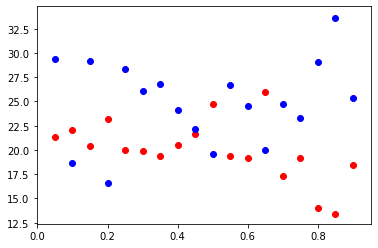

In [34]:
from sklearn.model_selection import train_test_split

errorlist = []
size = []
x= 0.05
while x < 0.95:
    x_train,x_test,y_train,y_test= train_test_split(X,y,test_size=x)
    linreg = LinearRegression()
    linreg.fit(x_train,y_train)
    y_train_hat = linreg.predict(x_train)
    y_test_hat= linreg.predict(x_test)
    train_mse= mean_squared_error(y_train,y_train_hat)
    test_mse= mean_squared_error(y_test,y_test_hat)
    size.append(x)
    errorlist.append([train_mse,test_mse])
    x = round((x + 0.05),2)
    
    
traintesterrors = pd.DataFrame(errorlist,columns=['train','test'])
sizeframe = pd.DataFrame(size,columns=['sizes'])
print(traintesterrors.describe(),sizeframe.describe())

plt.scatter(sizeframe,traintesterrors['train'],c='red')
plt.scatter(sizeframe,traintesterrors['test'],c='blue')
    


# Evaluate the effect of train-test split size: Extension

Repeat the previous example, but for each train-test split size, generate 100 iterations of models/errors and save the average train/test error. This will help account for any particularly good/bad models that might have resulted from poor/good splits in the data. 

           train       test
count  18.000000  18.000000
mean   20.002757  24.901729
std     3.155048   4.351747
min    13.415914  16.630174
25%    19.190539  22.465238
50%    19.937021  25.062265
75%    21.595441  27.932143
max    26.018031  33.596028            sizes
count  18.000000
mean    0.475000
std     0.266927
min     0.050000
25%     0.262500
50%     0.475000
75%     0.687500
max     0.900000


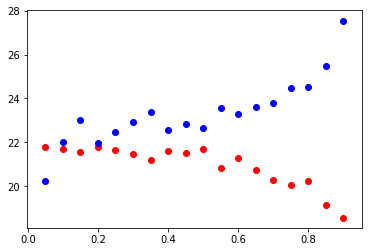

In [36]:
collection = []
size = []
x= 0.05
while x < 0.95:
    errorlist = []
    for j in range(1,100):
        x_train,x_test,y_train,y_test= train_test_split(X,y,test_size=x)
        linreg = LinearRegression()
        linreg.fit(x_train,y_train)
        y_train_hat = linreg.predict(x_train)
        y_test_hat= linreg.predict(x_test)
        train_mse= mean_squared_error(y_train,y_train_hat)
        test_mse= mean_squared_error(y_test,y_test_hat)
        errorlist.append([train_mse,test_mse])
    
    
    saveframe = pd.DataFrame(errorlist,columns=['train','test'])
    collection.append([saveframe['train'].mean(),saveframe['test'].mean()])   
      
    
    size.append(x)
    errorlist.append([train_mse,test_mse])
    x = round((x + 0.05),2)
    
    
coll_frame = pd.DataFrame(collection,columns=['train','test'])
sizeframe = pd.DataFrame(size,columns=['sizes'])
print(traintesterrors.describe(),sizeframe.describe())

plt.scatter(sizeframe,coll_frame['train'],c='red')
plt.scatter(sizeframe,coll_frame['test'],c='blue')
    


What's happening here? Evaluate your result!

Looks like the optimal test size is at least 60%. Smaller test sizes than this lead to a large disparity in the MSE of the train and the test data.

##  Summary 

Congratulations! You now practiced your knowledge of MSE and used your train-test split skills to validate your model.